# Water Potability (82% Accuracy)

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

### Eksplorasi dan Persiapan Data

#### Load Data

In [2]:
df = pd.read_csv('water_potability.csv')

#### Menampilkan 5 data pertama

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

#### Menampilkan baris dan kolom dari dataset

In [4]:
df.shape

(3276, 10)

Dataset berisi, baris: 3276 dan kolom: 10

#### Menampilkan statistik deskriptif dari dataset

In [5]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

#### Menampilkan tipe data setiap kolom dari dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#### Menampilkan jumlah baris yang bernilai kosong pada tiap kolom

In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### Treating Missing Values

#### Memisahkan dataset menjadi dua dataset berdasarkan nilai pada kolom "potability"

In [8]:
df0 = df.loc[df['Potability'] == 0, :]
df0

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3112  6.616731  195.096968  34277.760400     7.632639         NaN   
3113  7.734569  230.919506  21776.594455     6.908591         NaN   
3114  6.971577  185.906938  27959.987873     7.214510  349.743879   
3115  4.709187  179.141018  22291.418577     6.774276  407.417977   
3116  5.230003  176.714023  27971.891806     7.597981  413.914001   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3112    417.465080       13.432557        47.945936   3.622379           0  
3113    395.114961       15.033557        92.697369   3.821456           0  
3114    414.067354       19.882917        36.179003   3.226349           0  
3115    371.264843       18.186801        86.528627   3.860084           0  
3116    440.355374       14.423614        72.837370   3.045612           0  

[1998 rows x 10 columns]

In [9]:
df1 = df.loc[df['Potability'] == 1, :]
df1

ph    Hardness        Solids  Chloramines     Sulfate  \
250   9.445130  145.805402  13168.529156     9.444471  310.583374   
251   9.024845  128.096691  19859.676476     8.016423  300.150377   
252        NaN  169.974849  23403.637304     8.519730         NaN   
253   6.800119  242.008082  39143.403329     9.501695  187.170714   
254   7.174135  203.408935  20401.102461     7.681806  287.085679   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
250     592.659021        8.606397        77.577460   3.875165           1  
251     451.143481       14.770863        73.778026   3.985251           1  
252     475.573562       12.924107        50.861913   2.747313           1  
253     376.456593       11.432466        73.777275   3.854940           1  
254     315.549900       14.533510        74.405616   3.939896           1  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[1278 rows x 10 columns]

#### Mengisi baris yang kosong dengan rata-rata dari tiap kolom pada dataset

In [10]:
df0['ph'].fillna(value=df0['ph'].mean(), inplace=True)
df0['Sulfate'].fillna(value=df0['Sulfate'].mean(), inplace=True)
df0['Trihalomethanes'].fillna(value=df0['Trihalomethanes'].mean(), inplace=True)
df0

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3112  6.616731  195.096968  34277.760400     7.632639  334.564290   
3113  7.734569  230.919506  21776.594455     6.908591  334.564290   
3114  6.971577  185.906938  27959.987873     7.214510  349.743879   
3115  4.709187  179.141018  22291.418577     6.774276  407.417977   
3116  5.230003  176.714023  27971.891806     7.597981  413.914001   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3112    417.465080       13.432557        47.945936   3.622379           0  
3113    395.114961       15.033557        92.697369   3.821456           0  
3114    414.067354       19.882917        36.179003   3.226349           0  
3115    371.264843       18.186801        86.528627   3.860084           0  
3116    440.355374       14.423614        72.837370   3.045612           0  

[1998 rows x 10 columns]

In [11]:
df1['ph'].fillna(value=df1['ph'].mean(), inplace=True)
df1['Sulfate'].fillna(value=df1['Sulfate'].mean(), inplace=True)
df1['Trihalomethanes'].fillna(value=df1['Trihalomethanes'].mean(), inplace=True)
df1

ph    Hardness        Solids  Chloramines     Sulfate  \
250   9.445130  145.805402  13168.529156     9.444471  310.583374   
251   9.024845  128.096691  19859.676476     8.016423  300.150377   
252   7.073783  169.974849  23403.637304     8.519730  332.566990   
253   6.800119  242.008082  39143.403329     9.501695  187.170714   
254   7.174135  203.408935  20401.102461     7.681806  287.085679   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
250     592.659021        8.606397        77.577460   3.875165           1  
251     451.143481       14.770863        73.778026   3.985251           1  
252     475.573562       12.924107        50.861913   2.747313           1  
253     376.456593       11.432466        73.777275   3.854940           1  
254     315.549900       14.533510        74.405616   3.939896           1  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.539684   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[1278 rows x 10 columns]

#### Menggabungkan kembali dataset yang telah dipisah menjadi dua

In [12]:
df = pd.concat([df0, df1], axis=0)
df

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225        66.539684   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

#### Menampilkan kembali jumlah baris yang kosong pada tiap kolom yang sudah di treatment

In [13]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### Data Visualization

#### Mengecek korelasi antar kolom

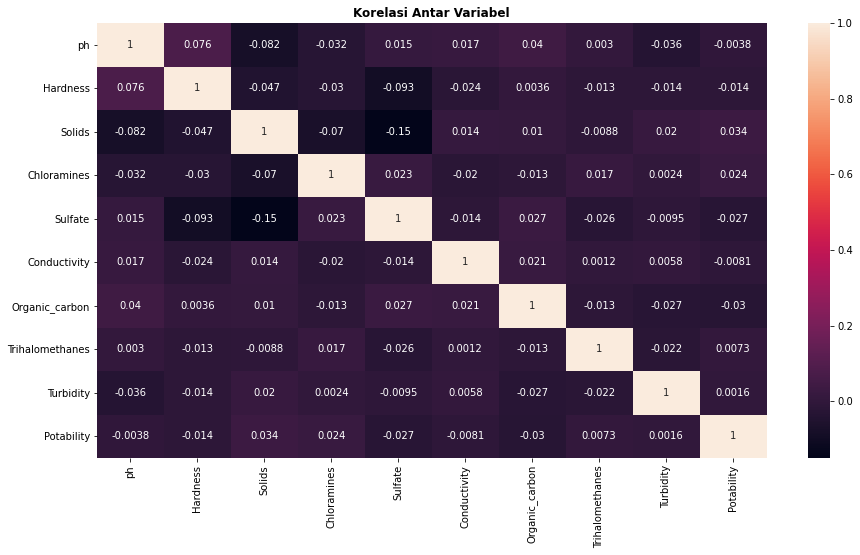

In [14]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True)
plt.title('Korelasi Antar Variabel', fontweight='bold')
plt.show()

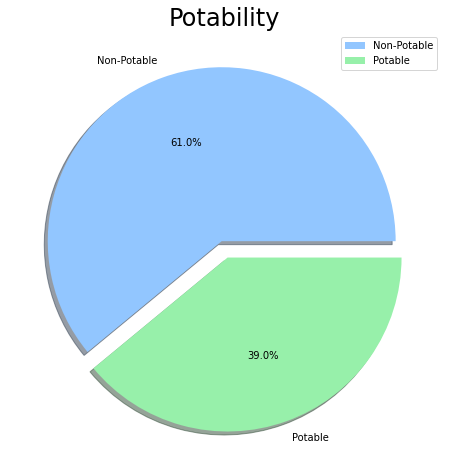

In [15]:
labels = ['Non-Potable', 'Potable']
data = [df['Potability'].value_counts()[0], df['Potability'].value_counts()[1]]

plt.style.use('seaborn-pastel')
plt.figure(figsize=(15,8))
plt.pie(data, labels=labels, explode=[0.05]*2, autopct='%1.1f%%', shadow=True)
plt.title('Potability', fontsize=24)
plt.legend()

plt.show()

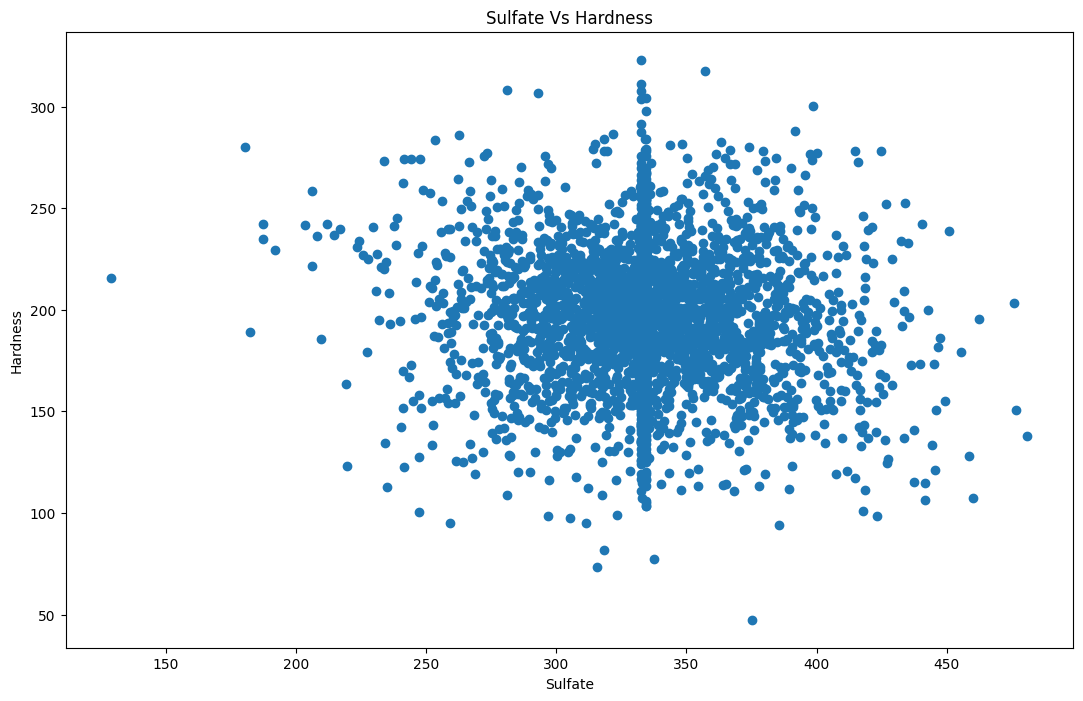

In [16]:
plt.style.use('default')
plt.figure(figsize=(13, 8))
plt.scatter(df['Sulfate'], df['Hardness'])

plt.xlabel('Sulfate')
plt.ylabel('Hardness')
plt.title('Sulfate Vs Hardness')

plt.show()

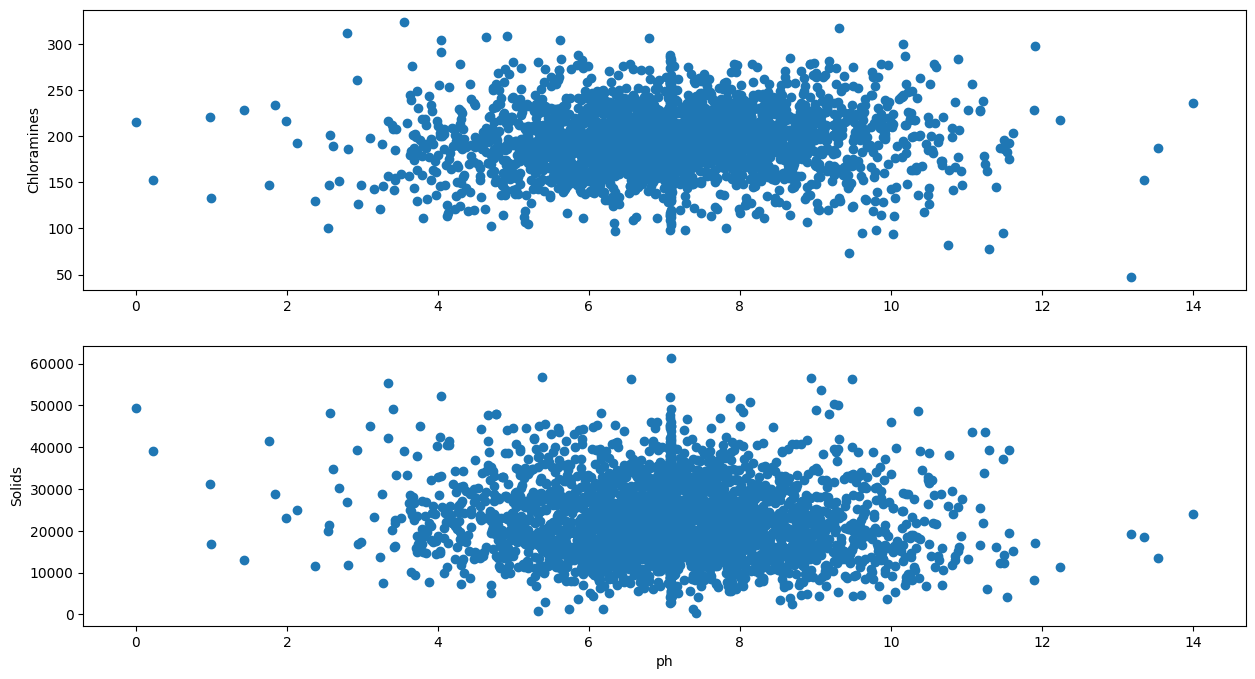

In [17]:
plt.style.use('default')
plt.figure(figsize=(15,8))

plt.subplot(2,1,1)
plt.scatter(df['ph'], df['Hardness'])
plt.ylabel('Chloramines')


plt.subplot(2,1,2)
plt.scatter(df['ph'], df['Solids'])
plt.xlabel('ph')
plt.ylabel('Solids')

plt.show()

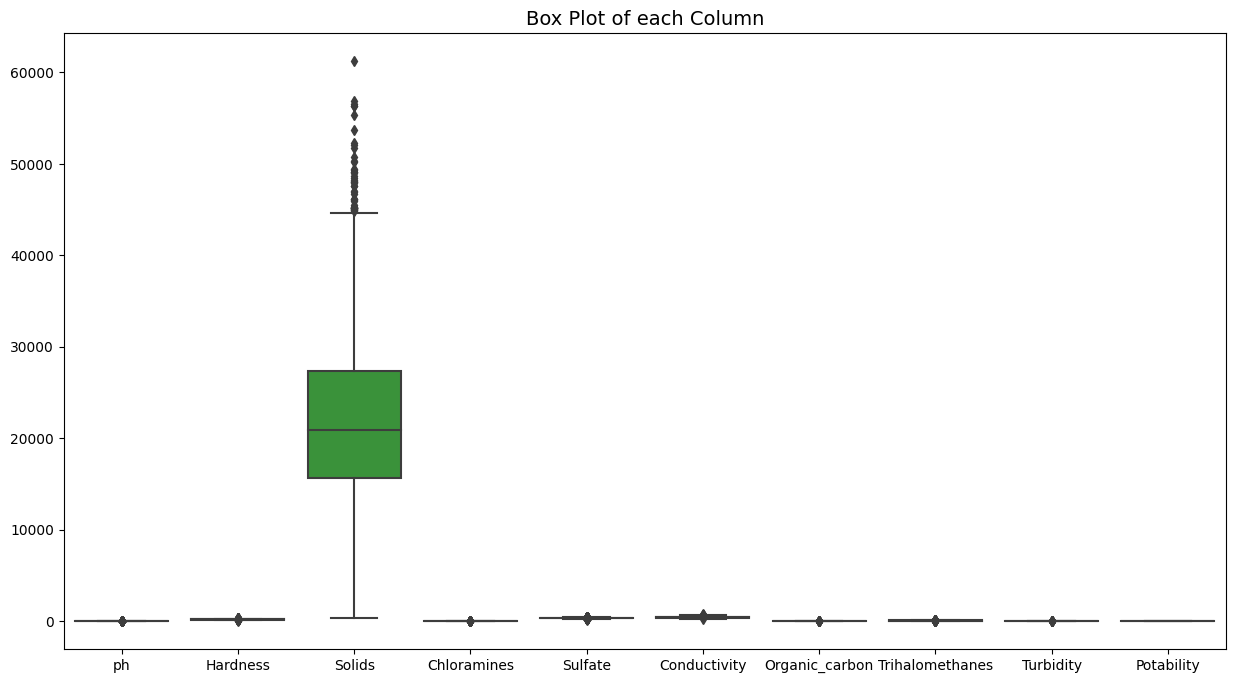

In [18]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title('Box Plot of each Column', fontsize=14)
plt.show()

In [19]:
df_nosol = df.drop(['Solids'], axis=1)
df_nosol

ph    Hardness  Chloramines     Sulfate  Conductivity  \
0     7.085378  204.890455     7.300212  368.516441    564.308654   
1     3.716080  129.422921     6.635246  334.564290    592.885359   
2     8.099124  224.236259     9.275884  334.564290    418.606213   
3     8.316766  214.373394     8.059332  356.886136    363.266516   
4     9.092223  181.101509     6.546600  310.135738    398.410813   
...        ...         ...          ...         ...           ...   
3271  4.668102  193.681735     7.166639  359.948574    526.424171   
3272  7.808856  193.553212     8.061362  332.566990    392.449580   
3273  9.419510  175.762646     7.350233  332.566990    432.044783   
3274  5.126763  230.603758     6.303357  332.566990    402.883113   
3275  7.874671  195.102299     7.509306  332.566990    327.459760   

      Organic_carbon  Trihalomethanes  Turbidity  Potability  
0          10.379783        86.990970   2.963135           0  
1          15.180013        56.329076   4.500656           0  
2          16.868637        66.420093   3.055934           0  
3          18.436524       100.341674   4.628771           0  
4          11.558279        31.997993   4.075075           0  
...              ...              ...        ...         ...  
3271       13.894419        66.687695   4.435821           1  
3272       19.903225        66.539684   2.798243           1  
3273       11.039070        69.845400   3.298875           1  
3274       11.168946        77.488213   4.708658           1  
3275       16.140368        78.698446   2.309149           1  

[3276 rows x 9 columns]

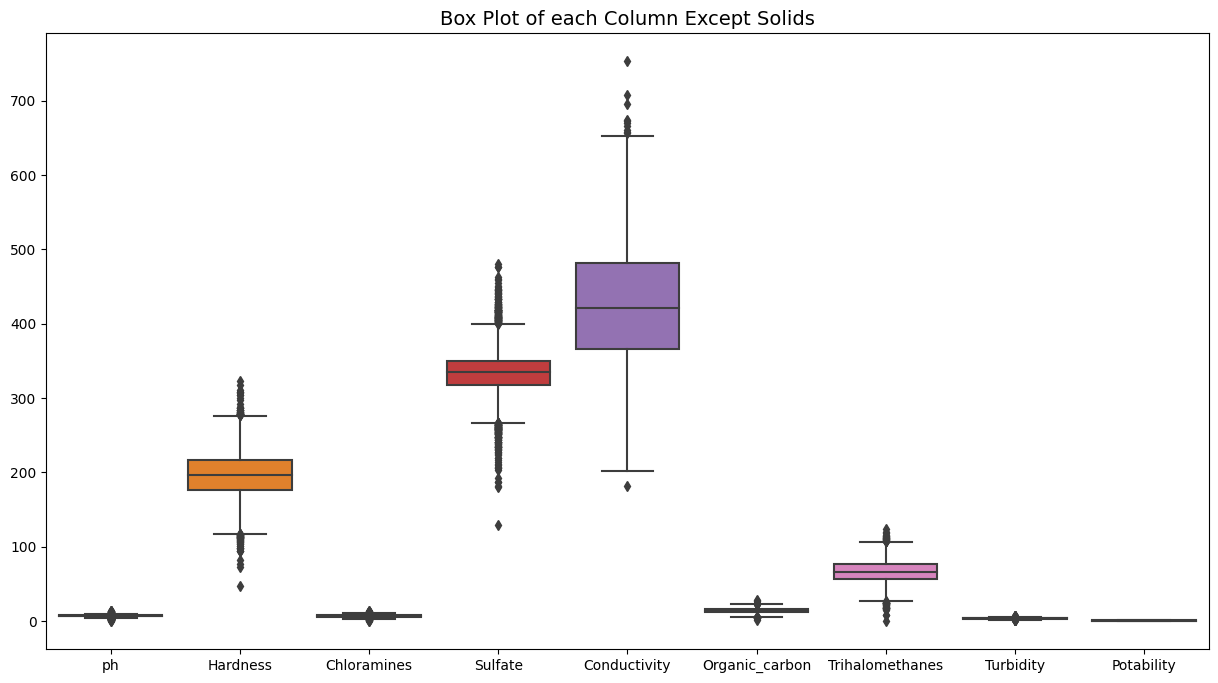

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_nosol)
plt.title('Box Plot of each Column Except Solids', fontsize=14)
plt.show()

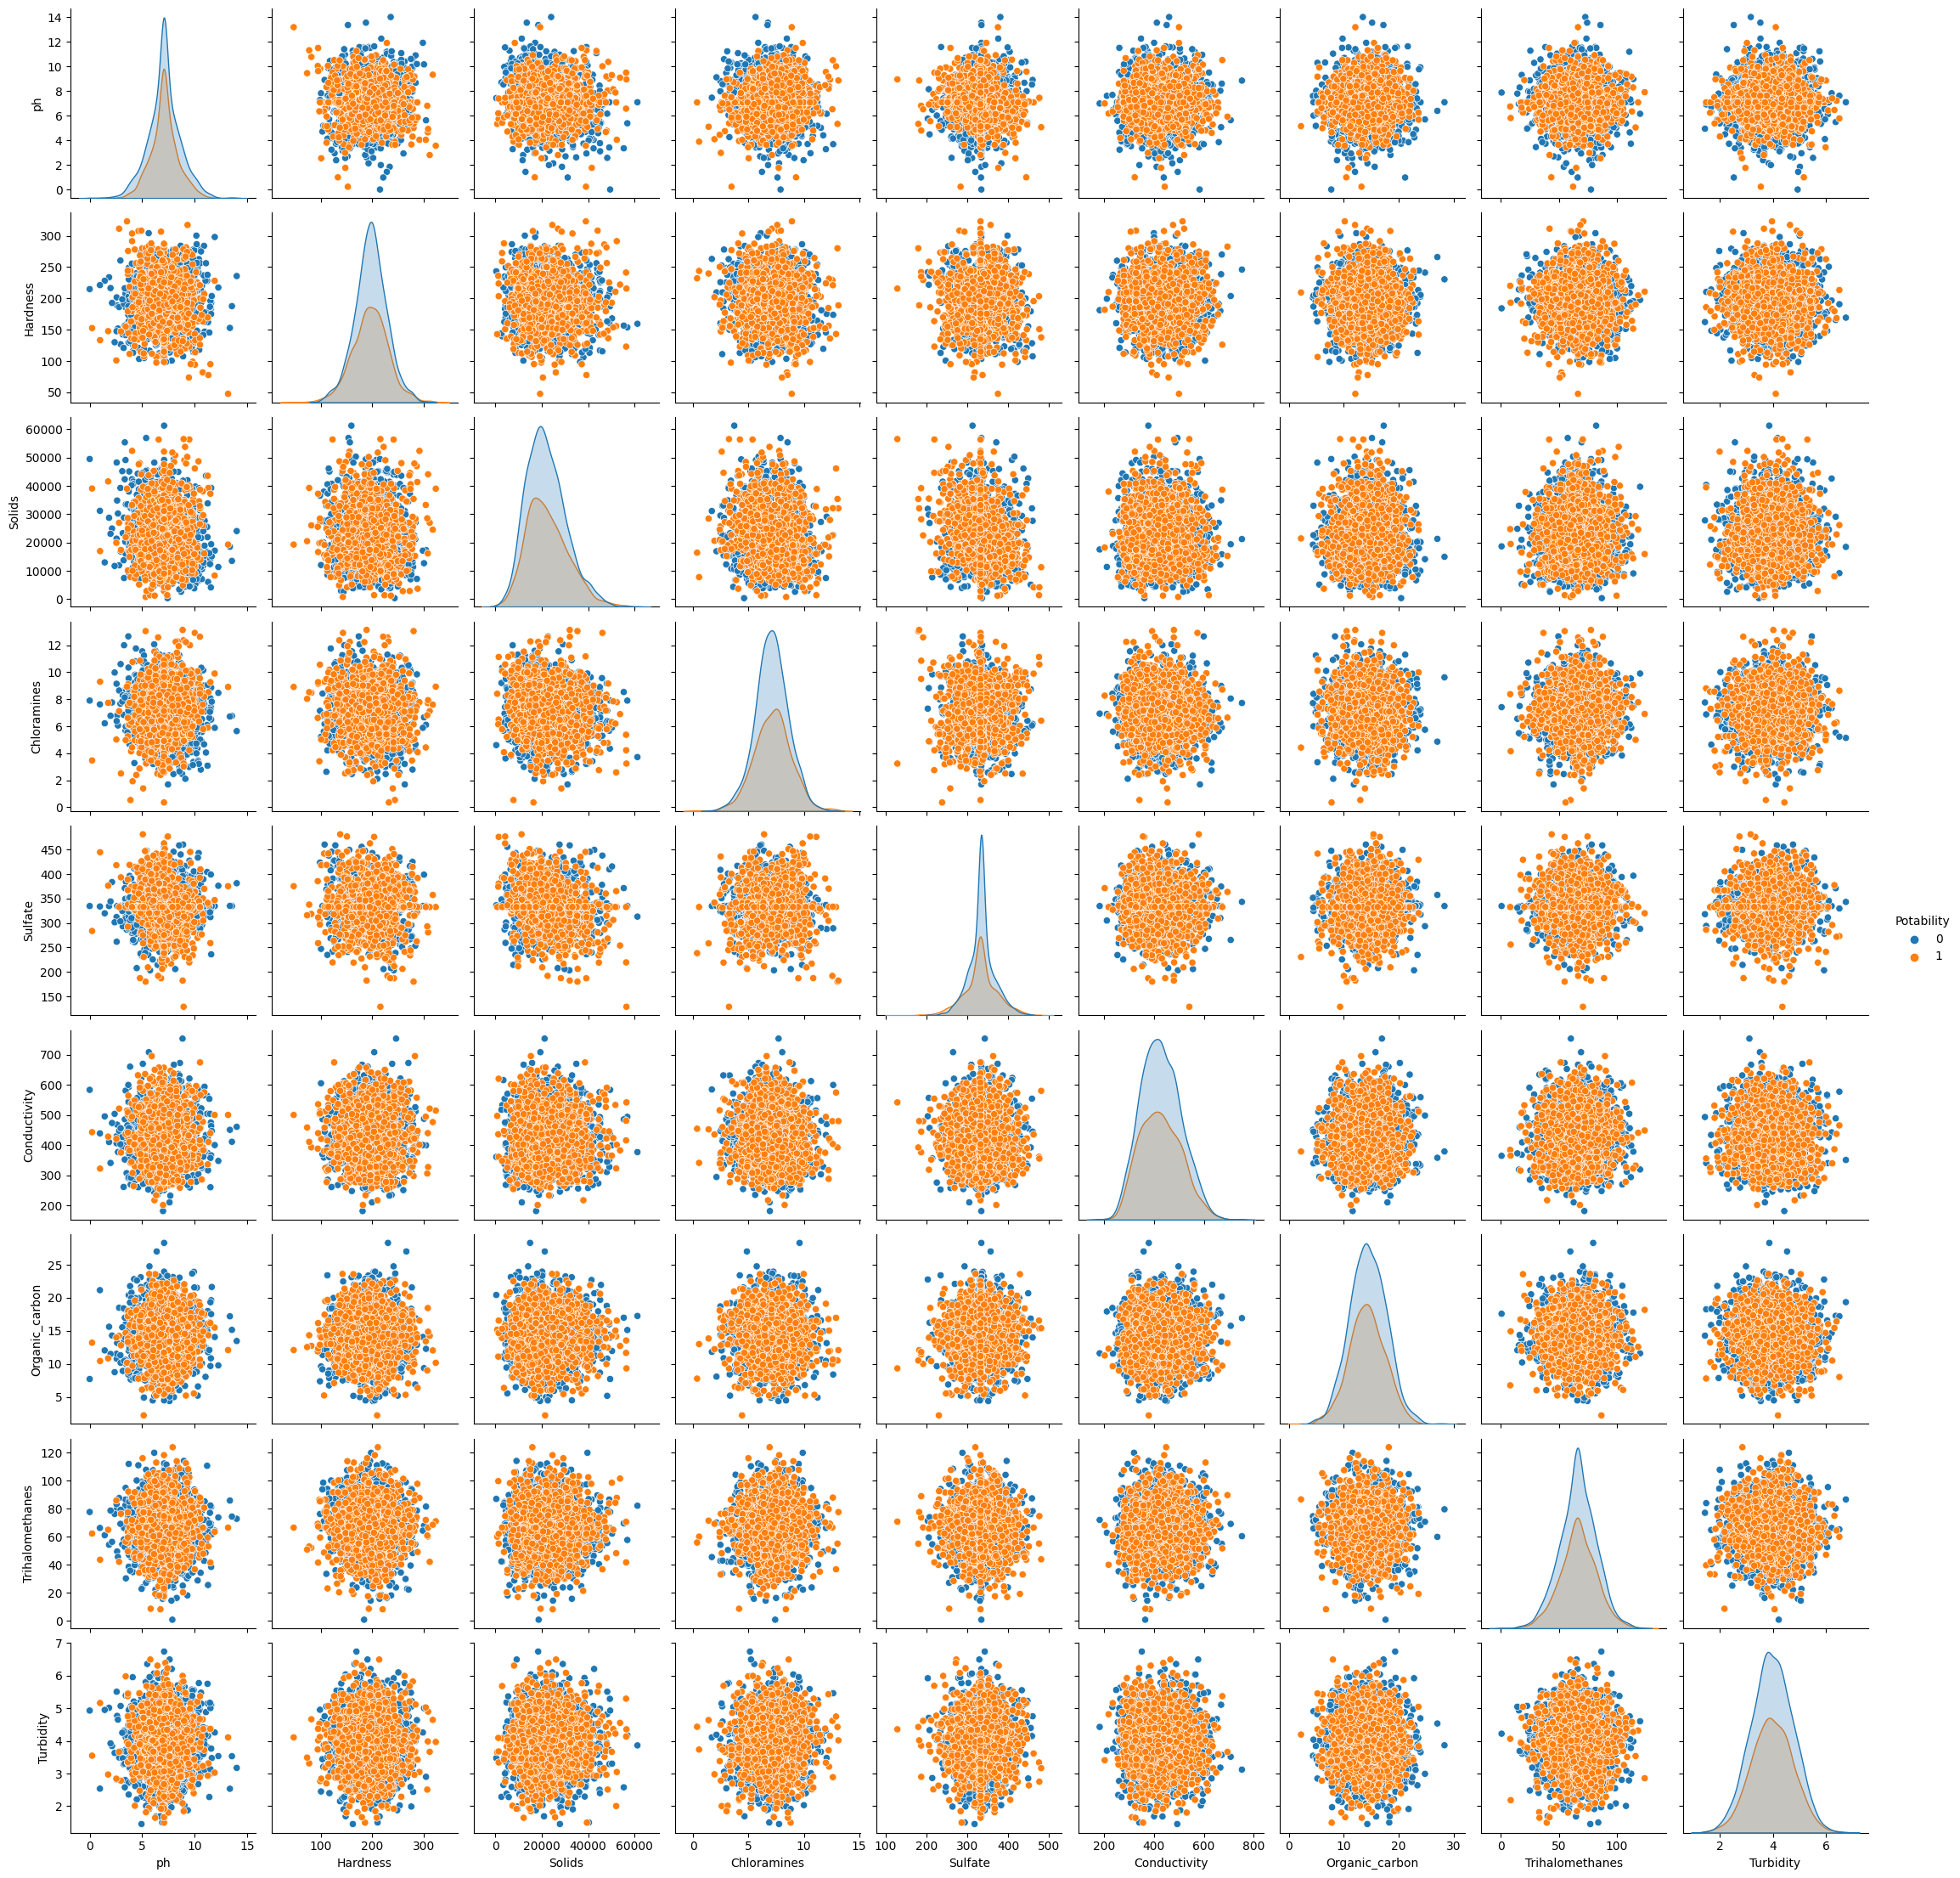

In [21]:
plt.style.use('default')
sns.pairplot(df, hue='Potability')
plt.show()

### DATA PREPROCESSING

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#### Splitting dataset

In [23]:
X = df.drop(columns='Potability')
X

ph    Hardness        Solids  Chloramines     Sulfate  \
0     7.085378  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246  334.564290   
2     8.099124  224.236259  19909.541732     9.275884  334.564290   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362  332.566990   
3273  9.419510  175.762646  33155.578218     7.350233  332.566990   
3274  5.126763  230.603758  11983.869376     6.303357  332.566990   
3275  7.874671  195.102299  17404.177061     7.509306  332.566990   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
0       564.308654       10.379783        86.990970   2.963135  
1       592.885359       15.180013        56.329076   4.500656  
2       418.606213       16.868637        66.420093   3.055934  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
...            ...             ...              ...        ...  
3271    526.424171       13.894419        66.687695   4.435821  
3272    392.449580       19.903225        66.539684   2.798243  
3273    432.044783       11.039070        69.845400   3.298875  
3274    402.883113       11.168946        77.488213   4.708658  
3275    327.459760       16.140368        78.698446   2.309149  

[3276 rows x 9 columns]

In [24]:
y = df['Potability']
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

#### Standardizing dataset

In [25]:
sc = StandardScaler()
X = sc.fit_transform(X)

#### Training dan Testing dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### MODELS

#### SVM

In [27]:
from sklearn.svm import SVC

In [28]:
water_svc = SVC(random_state=1)
water_svc.fit(X_train, y_train)

SVC(random_state=1)

In [29]:
from sklearn.metrics import classification_report

In [30]:
y_pred_svc = water_svc.predict(X_test)
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

[[395  27]
 [150  84]]
              precision    recall  f1-score   support

           0       0.72      0.94      0.82       422
           1       0.76      0.36      0.49       234

    accuracy                           0.73       656
   macro avg       0.74      0.65      0.65       656
weighted avg       0.74      0.73      0.70       656



In [31]:
acc_svc = (accuracy_score(y_test, y_pred_svc) * 100).round()

#### K Nearest Neighbors

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
water_knn = KNeighborsClassifier(n_neighbors=3)
water_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_pred_knn = water_knn.predict(X_test)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[306 116]
 [125 109]]
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       422
           1       0.48      0.47      0.47       234

    accuracy                           0.63       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.63      0.63      0.63       656



In [35]:
acc_knn = (accuracy_score(y_test, y_pred_knn) * 100).round()

#### Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
water_logreg = LogisticRegression(random_state=1)
water_logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [38]:
y_pred_logreg = water_logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

[[422   0]
 [234   0]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       422
           1       0.00      0.00      0.00       234

    accuracy                           0.64       656
   macro avg       0.32      0.50      0.39       656
weighted avg       0.41      0.64      0.50       656



In [39]:
acc_logreg = (accuracy_score(y_test, y_pred_logreg) * 100).round()

#### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
water_tree = DecisionTreeClassifier(random_state=1)
water_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [42]:
y_pred_tree = water_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

[[342  80]
 [ 68 166]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       422
           1       0.67      0.71      0.69       234

    accuracy                           0.77       656
   macro avg       0.75      0.76      0.76       656
weighted avg       0.78      0.77      0.78       656



In [43]:
acc_tree = (accuracy_score(y_test, y_pred_tree) * 100).round()

#### Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
water_forest = RandomForestClassifier(random_state=1)
water_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [46]:
y_pred_forest = water_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred_forest))
print(classification_report(y_test, y_pred_forest))

[[383  39]
 [ 77 157]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       422
           1       0.80      0.67      0.73       234

    accuracy                           0.82       656
   macro avg       0.82      0.79      0.80       656
weighted avg       0.82      0.82      0.82       656



In [48]:
acc_forest = (accuracy_score(y_test, y_pred_forest) * 100).round()

In [49]:
accuracy = pd.DataFrame({
    'Models': ['Support Vector Machine', 'K-Nearest Neighbors', 'Logistic regression', 
                'Decision Tree', 'Random Forest'],
    'Score' : [acc_svc, acc_knn, acc_logreg, acc_tree, acc_forest]})
accuracy['Score'] = accuracy['Score'].astype(str) + '%'
accuracy.sort_values(by='Score', ascending=False)

Models  Score
4           Random Forest  82.0%
3           Decision Tree  77.0%
0  Support Vector Machine  73.0%
2     Logistic regression  64.0%
1     K-Nearest Neighbors  63.0%

### The End